In [343]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

In [344]:
data = pd.read_csv('../Results/latencyWinAPIC.csv')

In [345]:
print(data.head())
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

   Run   Open  Write   Read  Close
0    1  338.8  710.2  140.3  572.3
1    2  238.6  182.9   13.1  259.1
2    3  227.2  106.1   11.4  276.7
3    4  212.2  107.1   11.9  142.2
4    5  160.0  148.6   21.8  184.7


In [346]:
data_stats = pd.DataFrame(columns=['Operation', 'Max', 'Min', 'Mean', 'Median', 'Std Dev', 'Lower 95%', 'Upper 95%', 'Lower 99%', 'Upper 99%', 'LBound 95% ConfI', 'UBound 95% ConfI', 'LBound 99% ConfI', 'UBound 99% ConfI'])
data_stats['Operation'] = data.columns[1:]
data_stats['Max'] = data_stats['Operation'].apply(lambda x: data[x].max())
data_stats['Min'] = data_stats['Operation'].apply(lambda x: data[x].min())
data_stats['Mean'] = data_stats['Operation'].apply(lambda x: data[x].mean())
data_stats['Median'] = data_stats['Operation'].apply(lambda x: data[x].median())
data_stats['Std Dev'] = data_stats['Operation'].apply(lambda x: data[x].std())
data_stats['Upper 95%'] = data_stats['Operation'].apply(lambda x: st.scoreatpercentile(data[x], 95))
data_stats['Lower 95%'] = data_stats['Operation'].apply(lambda x: st.scoreatpercentile(data[x], 5))
data_stats['Upper 99%'] = data_stats['Operation'].apply(lambda x: st.scoreatpercentile(data[x], 99))
data_stats['Lower 99%'] = data_stats['Operation'].apply(lambda x: st.scoreatpercentile(data[x], 1))
data_stats['UBound 95% ConfI'] = data_stats['Operation'].apply(lambda x: pd.Series(st.t.interval(0.95, len(data[x])-1, loc=data[x].mean(), scale=data[x].sem()), index=['Lower Bound', 'Upper Bound'])["Upper Bound"])
data_stats['LBound 95% ConfI'] = data_stats['Operation'].apply(lambda x: pd.Series(st.t.interval(0.95, len(data[x])-1, loc=data[x].mean(), scale=data[x].sem()), index=['Lower Bound', 'Upper Bound'])["Lower Bound"])
data_stats['UBound 99% ConfI'] = data_stats['Operation'].apply(lambda x: pd.Series(st.t.interval(0.99, len(data[x])-1, loc=data[x].mean(), scale=data[x].sem()), index=['Lower Bound', 'Upper Bound'])["Upper Bound"])
data_stats['LBound 99% ConfI'] = data_stats['Operation'].apply(lambda x: pd.Series(st.t.interval(0.99, len(data[x])-1, loc=data[x].mean(), scale=data[x].sem()), index=['Lower Bound', 'Upper Bound'])["Lower Bound"])
print(data_stats)


  Operation      Max   Min        Mean  Median     Std Dev  Lower 95%  \
0      Open  28394.8  45.2  107.428500    84.0  151.232883       57.6   
1     Write  45334.9  15.3   68.428028    52.1  170.283831       39.4   
2      Read   2346.9   3.6    7.526780     5.4   17.058274        3.9   
3     Close  47079.0  37.0  116.693870    99.8  223.986474       61.7   

   Upper 95%  Lower 99%  Upper 99%  LBound 95% ConfI  UBound 95% ConfI  \
0      210.6       52.5    341.900        106.491155        108.365845   
1      136.6       37.8    232.801         67.372605         69.483451   
2       13.3        3.8     41.500          7.421052          7.632508   
3      213.0       58.2    358.702        115.305596        118.082144   

   LBound 99% ConfI  UBound 99% ConfI  
0        106.196611        108.660389  
1         67.040957         69.815099  
2          7.387829          7.665731  
3        114.869356        118.518384  


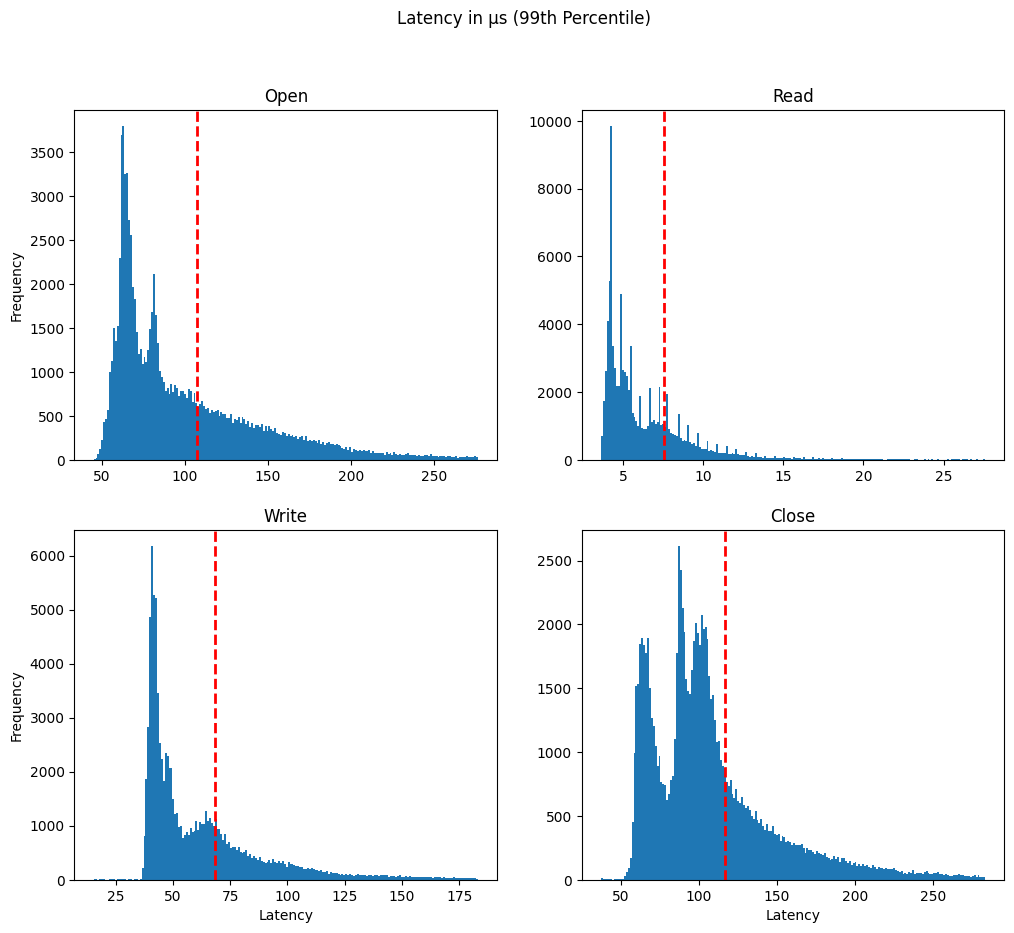

In [347]:
bins=200
percent=98
percentile_open = np.percentile(data['Open'], percent)
filtered_open = data['Open'][data['Open'] <= percentile_open]
percentile_read = np.percentile(data['Read'], percent)
filtered_read = data['Read'][data['Read'] <= percentile_read]
percentile_write = np.percentile(data['Write'], percent)
filtered_write = data['Write'][data['Write'] <= percentile_write]
percentile_close = np.percentile(data['Close'], percent)
filtered_close = data['Close'][data['Close'] <= percentile_close]

fig, axs = plt.subplots(2,2, figsize=(12,10))
fig.suptitle("Latency in µs (99th Percentile)")

axs[0,0].hist(filtered_open, bins=bins)
axs[0,0].set_title('Open')
axs[0,0].axvline(data_stats.iloc[0, 3], color='r', linestyle='dashed', linewidth=2, label='Mean')
axs[0,1].hist(filtered_read, bins=bins)
axs[0,1].set_title('Read')
axs[0,1].axvline(data_stats.iloc[2, 3], color='r', linestyle='dashed', linewidth=2, label='Mean')
axs[1,0].hist(filtered_write, bins=bins)
axs[1,0].set_title('Write')
axs[1,0].axvline(data_stats.iloc[1, 3], color='r', linestyle='dashed', linewidth=2, label='Mean')
axs[1,1].hist(filtered_close, bins=bins)
axs[1,1].set_title('Close')
axs[1,1].axvline(data_stats.iloc[3, 3], color='r', linestyle='dashed', linewidth=2, label='Mean')

axs[0,0].set_ylabel('Frequency')
axs[1,0].set_ylabel('Frequency')
axs[1,0].set_xlabel('Latency')
axs[1,1].set_xlabel('Latency')

plt.show()

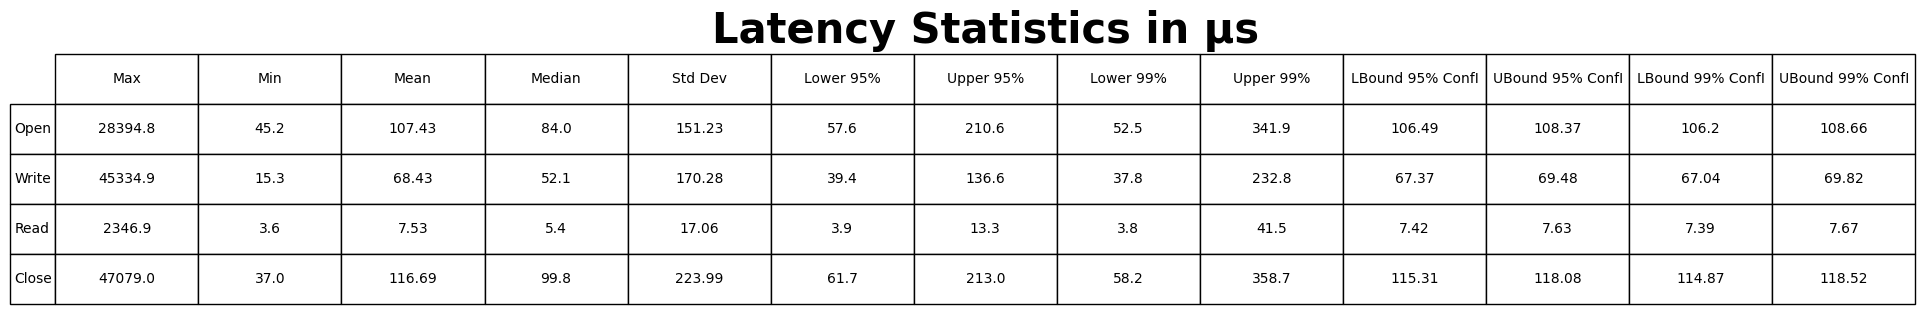

In [348]:
stats = data_stats.set_index('Operation')
columns = [i for i in stats.columns if i != 'Operation']
table_data = stats[columns].apply(pd.to_numeric, errors='coerce').round(2)

fig, ax = plt.subplots(figsize=(12, 3))
ax.axis('off')

table = ax.table(cellText=table_data.values,
                 rowLabels=table_data.index,
                 colLabels=table_data.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(2, 3)

ax.set_title('Latency Statistics in µs', fontsize=30, fontweight='bold', pad=15)
plt.show()